In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [27]:
import pandas as pd

df = pd.read_excel('/Users/andreasbrogaard/Documents/dsp_project/dsp_project/Data Collection/gpt_response_clean copy.xlsx')

#df_train = df[['Type', 'Ask.price', 'Year_built', 'Energy_rating', 'Monthly_ownership_cost', 'Days_desc', 'Municipality', 'Rooms', 'Monthly_ownership_cost.1', 'Location', '#Bathrooms', 'Cond.house', 'View', 'Balcony', 'Garden', 'Parking', 'Swimming pool', 'Fireplace', 'Garage', 'Basement', 'Elevator', 'Air_conditioning', 'Heating_type']]
#df = df[[ 'Ask.price', 'Type', 'Year_built', 'Energy_rating', 'Monthly_ownership_cost', 'Days_desc', 'Municipality', 'Rooms', 'Location', '#Bathrooms', 'Cond.house', 'View', 'Balcony', 'Garden', 'Parking', 'Swimming pool', 'Fireplace', 'Garage', 'Basement', 'Elevator', 'Air_conditioning', 'Heating_type']]
df.head()




,0,Type,Ask.price,Year_built,Energy_rating,Monthly_ownership_cost,Days_desc,Description,Municipality,Rooms,...,Balcony,Garden,Parking,Swimming pool,Fireplace,Garage,Basement,Elevator,Air_conditioning,Heating_type
0,Tingskovvej 70,Villa,2499000,1911.0,D,2466,51-100,Hyggelig villa med fede udearealer\nI Tranbjer...,Tranbjerg J,3.0,...,True,True,True,False,True,True,False,False,False,not_stated
1,"Sejrøgade 18, 4. TH",Ejerlejlighed,3495000,1930.0,D,3918,21-50,Flot 3-værelses lejlighed i Ø-gadekvarteret\nB...,Aarhus C,3.0,...,False,False,False,False,False,False,False,False,False,not_stated
2,Todderupparken 14,Villa,2748000,1970.0,D,2638,100+,1-plans familievilla på lukket vej\nDen yderst...,Tilst,4.0,...,False,True,True,False,False,False,False,False,False,not_stated
3,"Østergårdsvej 248, Astrup",Villa,3650000,1900.0,A2010,3204,1-10,Spændende ved­li­ge­hol­del­ses­ven­lig villa\...,Solbjerg,4.0,...,False,True,False,False,True,False,False,False,False,not_stated
4,"Grøfthøjparken 162, 3. th",Ejerlejlighed,1199000,1970.0,B,2050,1-10,"Fin 2´er i ""højhuset"" - pæn og nydelig\nI højh...",Viby J,2.0,...,False,False,False,False,False,False,False,False,False,not_stated


<H1> correcting the data types

In [31]:
df['Ask.price'] = pd.to_numeric(df['Ask.price'], errors='coerce')
df['Monthly_ownership_cost'] = pd.to_numeric(df['Monthly_ownership_cost'], errors='coerce')
df['Days_desc'] = df['Days_desc'].astype('category')
df['Municipality'] = df['Municipality'].astype('category')
df['Year_built'] = df['Year_built'].astype(int)
df['Rooms'] = df['Rooms'].astype(int)
df['sqm'] = df['sqm'].astype(int)
df['Energy_rating'] = df['Energy_rating'].astype('category')
df['Location'] = df['Location'].astype('category')
df['#Bathrooms'] = df['#Bathrooms'].astype('category')
df['cond.house'] = df['Cond.house'].astype('category')
df['View'] = df['View'].astype('category')

#Rest of the columns are boolean, pandas have already converted them to boolean



In [49]:
# Feature Engineering


# 3. Extract year information from 'Year_built' and create age feature
current_year = pd.to_datetime('today').year
df['Age'] = current_year - df['Year_built']

# 4. Encode categorical variables with one-hot encoding
categorical_features = ['Type', 'Energy_rating', 'Municipality', 'Heating_type']
df_encoded = pd.get_dummies(df, columns=categorical_features, drop_first=True)

# Display the first few rows of the modified dataframe
df_encoded.head()


,0,Ask.price,Year_built,Monthly_ownership_cost,Days_desc,Description,Rooms,Description.1,sqm,Monthly_ownership_cost.1,...,Heating_type_Radiator,Heating_type_Radiators,Heating_type_Var­me­gen­vin­dings­an­læg,Heating_type_fjernvarme,Heating_type_floor heating,Heating_type_gulvvarme,Heating_type_luft til vand varmepumpe,Heating_type_not_stated,Heating_type_solar,Heating_type_zoneopdelt gulvvarme
0,Tingskovvej 70,2499000,1911,2466,51-100,Hyggelig villa med fede udearealer\nI Tranbjer...,3,Hyggelig villa med fede udearealer\nI Tranbjer...,142,17599.0,...,False,False,False,False,False,False,False,True,False,False
1,"Sejrøgade 18, 4. TH",3495000,1930,3918,21-50,Flot 3-værelses lejlighed i Ø-gadekvarteret\nB...,3,Flot 3-værelses lejlighed i Ø-gadekvarteret\nB...,84,41607.0,...,False,False,False,False,False,False,False,True,False,False
2,Todderupparken 14,2748000,1970,2638,100+,1-plans familievilla på lukket vej\nDen yderst...,4,1-plans familievilla på lukket vej\nDen yderst...,140,19629.0,...,False,False,False,False,False,False,False,True,False,False
3,"Østergårdsvej 248, Astrup",3650000,1900,3204,1-10,Spændende ved­li­ge­hol­del­ses­ven­lig villa\...,4,Spændende ved­li­ge­hol­del­ses­ven­lig villa\...,208,17548.0,...,False,False,False,False,False,False,False,True,False,False
4,"Grøfthøjparken 162, 3. th",1199000,1970,2050,1-10,"Fin 2´er i ""højhuset"" - pæn og nydelig\nI højh...",2,"Fin 2´er i ""højhuset"" - pæn og nydelig\nI højh...",67,17896.0,...,False,False,False,False,False,False,False,True,False,False


In [60]:
df.columns

Index([                         0,                     'Type',
                      'Ask.price',               'Year_built',
                  'Energy_rating',   'Monthly_ownership_cost',
                      'Days_desc',              'Description',
                   'Municipality',                    'Rooms',
                  'Description.1',                      'sqm',
       'Monthly_ownership_cost.1',                 'Location',
                     '#Bathrooms',               'Cond.house',
                           'View',                  'Balcony',
                         'Garden',                  'Parking',
                  'Swimming pool',                'Fireplace',
                         'Garage',                 'Basement',
                       'Elevator',         'Air_conditioning',
                   'Heating_type',               'cond.house',
                            'Age'],
      dtype='object')

In [ ]:
# Selecting relevant columns excluding 'Description' and '0'
relevant_columns = df.columns.difference(['Description', 'Description.1', '0'])

# Creating a correlation matrix for these columns
correlation_matrix_all = df[relevant_columns].apply(lambda x: pd.factorize(x)[0] if x.dtype == 'object' else x).corr()

# Plotting the heatmap for all variables
plt.figure(figsize=(15, 10))
heatmap_all = sns.heatmap(correlation_matrix_all, annot=False, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Heatmap for All Variables (Excluding Descriptions)')
plt.show()


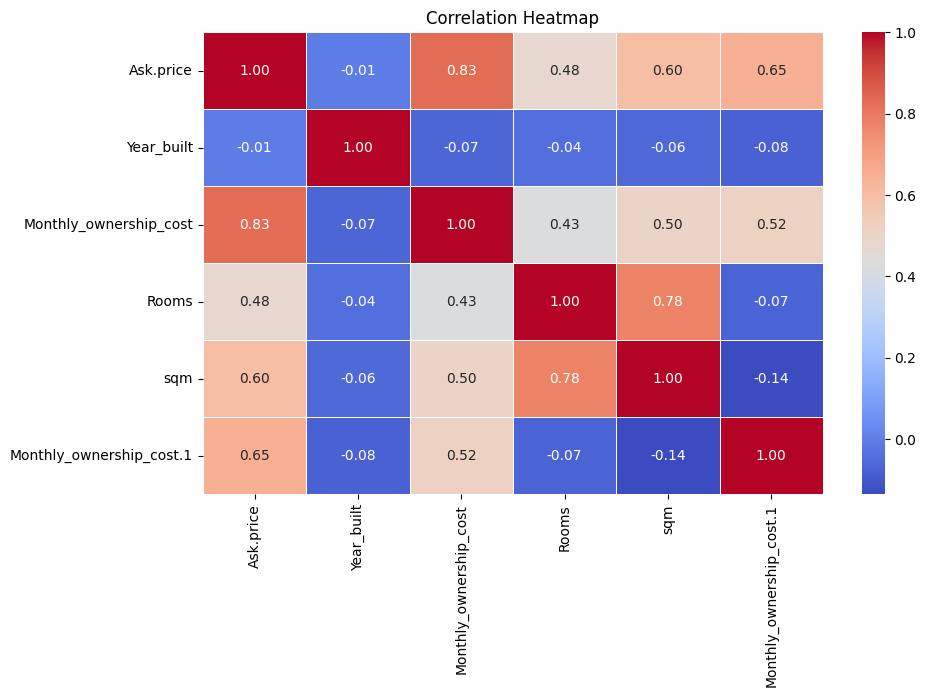

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selecting numeric columns for correlation
numeric_columns = ['Ask.price', 'Year_built', 'Monthly_ownership_cost', 'Rooms', 'sqm', 'Monthly_ownership_cost.1']
correlation_matrix = df[numeric_columns].corr()

# Plotting the heatmap
plt.figure(figsize=(10, 6))
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()
